# 使用functional API 建立神經網路

## 讀入基本套件

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Keras functions
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

# Keras dataset
from keras.datasets import mnist

# Keras utils
from keras.utils import np_utils

Using TensorFlow backend.


## 讀入訓練資料

In [4]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

print('There are %d training data with size %d X %d' % x_train0.shape)
print('There are %d testing data with size %d X %d' % x_test0.shape)

There are 60000 training data with size 28 X 28
There are 10000 testing data with size 28 X 28


In [5]:
#整理輸出輸入格式
x_train = x_train0.reshape(60000, 784)
x_test = x_test0.reshape(10000, 784)

x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

## functional API

### 決定架構，如下：

![title](img/API.png)

In [6]:
x = Input(shape=(784, ))

f1 = Dense(200, activation='relu')

f2 = Dense(100, activation='relu')
f3 = Dense(100, activation='relu')
f4 = Dense(100, activation='relu')

f5 = Dense(50, activation='relu')
f6 = Dense(50, activation='relu')

f7 = Dense(10, activation='softmax')

In [7]:
h1 = f1(x)

h21 = f2(h1)
h22 = f3(h1)
h23 = f4(h1)

h3 = concatenate([h21, h22, h23])

h41 = f5(h3)
h42 = f6(h3)

h5 = concatenate([h41, h42])

y   = f7(h5)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          20100       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 100)          20100       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [9]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [10]:
model_final = model.fit(x_train, y_train, batch_size = 100, epochs = 10, verbose = 1,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0846 - acc: 0.2796 - val_loss: 0.0764 - val_acc: 0.4692
Epoch 2/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0651 - acc: 0.5685 - val_loss: 0.0507 - val_acc: 0.6936
Epoch 3/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0420 - acc: 0.7432 - val_loss: 0.0326 - val_acc: 0.8105
Epoch 4/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0285 - acc: 0.8360 - val_loss: 0.0230 - val_acc: 0.8690
Epoch 5/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0218 - acc: 0.8722 - val_loss: 0.0187 - val_acc: 0.8910
Epoch 6/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0186 - acc: 0.8883 - val_loss: 0.0165 - val_acc: 0.9006
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 

In [11]:
score = model.evaluate(x_train, y_train)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1] * 100))

60000/60000 [==============================] - 4s 62us/step
Loss: 0.013416
準確率: 91.541667


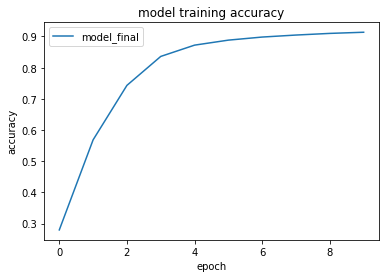

In [12]:
plt.plot(model_final.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['model_final'], loc = 'best')
plt.show()

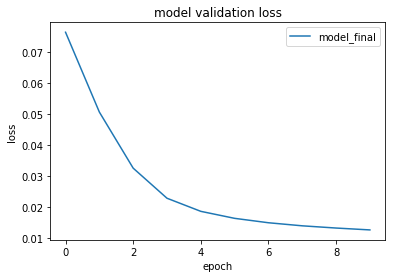

In [13]:
plt.plot(model_final.history["val_loss"])

plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['model_final'], loc = 'best')
plt.show()

### 結論：訓練十次後，正確率輕鬆達90%